# Inside the War Room: An NFL Draft Analysis (2000-2021)

## I. Introduction

As the National Football League (NFL) has expanded in size and popularity, so has the NFL draft in pursuing the next generation of star players. With the league's ever-changing rulebook and the game becoming more dynamic, every team is seeking to gain a competitive advantage in assembling their 52-man rosters. Hence, team owners and general managers commonly look at the yearly NFL draft to address their team's weak points and add a dash of young, raw, and driven talent to their rosters. That being said, not all NFL positions are created equally, and recent trends observed in the sport over the last few decades have subsequently compelled teams to reconsider how they build their rosters from the ground up—starting with the draft. Additionally, [with an abundance of literature and research](https://trace.tennessee.edu/cgi/viewcontent.cgi?article=1333&context=jasm) indicating the significance of a team's draft to its future success, it is more important than ever for all NFL franchises to dedicate a substantial portion of their offseason to scouting and scrutinizing the next cohort of athletes (Reynolds et al., 2015).

In this project, we will consider and potentially provide answers to questions such as:

- **Are certain positions more coveted in the draft than others?**
- **What does the average draft look like over the years?**
- **Do height, weight, and other attributes significantly help players' draft stock?**
- **How important are players' colleges they attended in determining their selection?**
- **Do successful and non-successful NFL teams behave differently in their approach to the draft?**

Our first steps should be loading the relevant datasets and considering some descriptive statistics.

## II. Initial Data Exploration

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(r'C:\Users\Connor\OneDrive\Documents\Data Analysis\Datasets\nfl_draft_data\2000-2021 Draft Picks.csv')

In [3]:
df.head(3)

,Year,Round,Pick,Overall,Name,Team,Position,School
0,2000,1,1,1,Courtney Brown,BROWNS,DE,Penn State
1,2000,1,2,2,LaVar Arrington,TEAM,LB,Penn State
2,2000,1,3,3,Chris Samuels,TEAM,T,Alabama


In [4]:
# Descriptive data, though not particularly useful without quantitative (and some categorical) player attributes
df.describe()

,Year,Round,Pick,Overall
count,5609.000000,5609.000000,5609.000000,5609.000000
mean,2010.503120,4.199501,19.067748,127.996078
std,6.348085,2.004709,11.136700,73.637546
min,2000.000000,1.000000,1.000000,1.000000
25%,2005.000000,3.000000,10.000000,64.000000
50%,2010.000000,4.000000,19.000000,128.000000
75%,2016.000000,6.000000,28.000000,192.000000
max,2021.000000,7.000000,54.000000,262.000000


In [5]:
# Number of rows (total players drafted) and columns
print(df.shape)
# columns
print(df.columns)

(5609, 8)
Index(['Year', 'Round', 'Pick', 'Overall', 'Name', 'Team', 'Position',
       'School'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5609 entries, 0 to 5608
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      5609 non-null   int64 
 1   Round     5609 non-null   int64 
 2   Pick      5609 non-null   int64 
 3   Overall   5609 non-null   int64 
 4   Name      5609 non-null   object
 5   Team      5609 non-null   object
 6   Position  5609 non-null   object
 7   School    5609 non-null   object
dtypes: int64(4), object(4)
memory usage: 350.7+ KB


## III. Cleaning and Enhancing the Data

We see that the data contains 5,609 players drafted in total from the years 2000-2021. Before examining and analyzing the data, we should clean and augment the data to ensure that we obtain accurate, insightful, and reliable results. Cleaning the dataset, though sometimes tedious, is paramount to our analysis.  

In [7]:
# The Washington Football Team is now known as the Washington Commanders, therefore we should replace it to avoid confusion
df = df.replace(to_replace = 'TEAM', value = 'COMMANDERS')

In [8]:
# Printing all positions selected in the years 2000-2021
print(df['Position'].unique())

['DE' 'LB' ' T' 'WR' 'RB' 'DT' 'TE' 'DB' ' K' 'QB' ' G' ' C' ' P']


One important part of the cleaning process is to check for duplicates. Unfortunately, since many NFL players share the same name, we need to check if the same unique row appears once and only once. 

In [9]:
# Check for exact duplicates
duplicate_rows = df[df.duplicated()]

# Print the result
if not duplicate_rows.empty:
    print("Exact duplicates were found:")
    print(duplicate_rows)
else:
    print("No exact duplicates were found.")

No exact duplicates were found.


At this moment, we should add important player attributes such as height and weight to our dataset. These characteristics, in addition to a player's position and college, should help give us even more insightful results. We can accomplish this by merging NFL Combine data—where college football players are evaluated physically and mentally prior to the draft—to our current dataset. 

In [10]:
combine_df = pd.read_csv(r'C:\Users\Connor\OneDrive\Documents\Data Analysis\Datasets\nfl_draft_data\combine_stats_df.csv', index_col = 0)
combine_df.head(10)

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,draft_year
0,John Abraham,OLB,South Carolina,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000.0
1,Shaun Alexander,RB,Alabama,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000.0
2,Darnell Alford,OT,Boston Col.,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000.0
3,Kyle Allamon,TE,Texas Tech,6-2,253.0,4.97,29.0,NaN,104.0,7.29,4.49,2000.0
4,Rashard Anderson,CB,Jackson State,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000.0
5,Jake Arians,K,Ala-Birmingham,5-10,202.0,NaN,NaN,NaN,NaN,NaN,NaN,2000.0
6,LaVar Arrington,OLB,Penn State,6-3,250.0,4.53,NaN,NaN,NaN,NaN,NaN,2000.0
7,Corey Atkins,OLB,South Carolina,6-0,237.0,4.72,31.0,21.0,112.0,7.96,4.39,2000.0
8,Kyle Atteberry,K,Baylor,6-0,167.0,NaN,NaN,NaN,NaN,NaN,NaN,2000.0
9,Reggie Austin,CB,Wake Forest,5-9,175.0,4.44,35.0,17.0,119.0,7.03,4.14,2000.0


In [11]:
combine_df.describe()

,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,draft_year
count,7656.000000,7206.000000,5932.000000,5096.000000,5859.000000,4792.000000,4895.000000,7680.000000
mean,242.748694,4.776363,32.894606,20.751766,114.596518,7.284451,4.399387,2011.228646
std,45.254869,0.304835,4.215423,6.384214,9.349189,0.417650,0.267074,6.692787
min,144.000000,4.220000,17.500000,2.000000,74.000000,6.280000,3.730000,2000.000000
25%,205.000000,4.540000,30.000000,16.000000,109.000000,6.970000,4.200000,2005.000000
50%,232.000000,4.690000,33.000000,21.000000,116.000000,7.190000,4.360000,2011.000000
75%,280.000000,4.977500,36.000000,25.000000,121.000000,7.530000,4.560000,2017.000000
max,384.000000,6.050000,46.500000,49.000000,147.000000,9.120000,5.560000,2022.000000


In [12]:
print(combine_df.columns)

Index(['Player', 'Pos', 'School', 'Ht', 'Wt', '40yd', 'Vertical', 'Bench',
       'Broad Jump', '3Cone', 'Shuttle', 'draft_year'],
      dtype='object')


A few things immediately stand out to us which will make the cleaning process a bit more taxing. First, the school/university attended by the player is often not spelled the same way as it is in our original dataset (e.g., Boston Col. != Boston College). Second, and though we can remove it, is that the 'Pos' column has more positions than the original dataset, opting for depth over clarity. Lastly, some NaN values are several quantitative combine attributes such as Bench and Broad Jump; however, this is to be expected since not every position/player partakes in these events at the combine. Let's fix the school spelling issue first.

In [13]:
# Iterate over each row in df
for index, row in df.iterrows():
    # Find the corresponding row in combine_df based on player name, draft year, and overall pick
    matching_row_index = (combine_df['Player'] == row['Name']) & (combine_df['draft_year'] == row['Year'])
    matching_row = combine_df[matching_row_index]
    
    # If a matching row is found
    if not matching_row.empty:
        # Update the college in combine_df to match df
        combine_df.loc[matching_row_index, 'School'] = row['School']

# verify that schools like  Boston Col. are now Boston College
combine_df.head()

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,draft_year
0,John Abraham,OLB,South Carolina,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000.0
1,Shaun Alexander,RB,Alabama,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000.0
2,Darnell Alford,OT,Boston College,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98,2000.0
3,Kyle Allamon,TE,Texas Tech,6-2,253.0,4.97,29.0,NaN,104.0,7.29,4.49,2000.0
4,Rashard Anderson,CB,Jackson State,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000.0


We can clearly see some differences between the two datasets. If we ignore these differences, we will have data that is either inconclusive or misleading, or both. For example, Offensive Tackle is listed as OT in the combine_stats dataset, but listed as T in the dataset we have been using thus far. Additionally, Defensive Back (DB) is now split into Cornerback (CB) and Safety (S) positions. Therefore, we must synchronize the datasets before we merge them in order to make sense of the data.

In [14]:
# Merge the datasets based on 'Name', 'School', and 'draft_year'
merged_data = pd.merge(df, combine_df, how='left', left_on=['Name', 'School', 'Year'], right_on=['Player', 'School', 'draft_year'])

# Print the merged dataset
merged_data.head()


,Year,Round,Pick,Overall,Name,Team,Position,School,Player,Pos,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,draft_year
0,2000,1,1,1,Courtney Brown,BROWNS,DE,Penn State,Courtney Brown,DE,6-5,269.0,4.78,NaN,NaN,NaN,NaN,NaN,2000.0
1,2000,1,2,2,LaVar Arrington,COMMANDERS,LB,Penn State,LaVar Arrington,OLB,6-3,250.0,4.53,NaN,NaN,NaN,NaN,NaN,2000.0
2,2000,1,3,3,Chris Samuels,COMMANDERS,T,Alabama,Chris Samuels,OT,6-5,325.0,5.08,NaN,NaN,NaN,NaN,NaN,2000.0
3,2000,1,4,4,Peter Warrick,BENGALS,WR,Florida State,Peter Warrick,WR,5-11,194.0,4.58,NaN,NaN,NaN,NaN,NaN,2000.0
4,2000,1,5,5,Jamal Lewis,RAVENS,RB,Tennessee,Jamal Lewis,RB,6-0,240.0,4.58,NaN,23.0,NaN,NaN,NaN,2000.0


In [15]:
merged_data.describe()

,Year,Round,Pick,Overall,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,draft_year
count,5616.000000,5616.000000,5616.000000,5616.000000,4475.000000,4287.000000,3537.000000,3128.000000,3487.000000,2919.000000,2974.000000,4489.000000
mean,2010.499466,4.199430,19.065883,127.991275,245.096760,4.749858,33.360418,21.418159,115.383998,7.251432,4.374375,2010.538204
std,6.348558,2.004742,11.139331,73.643207,45.407058,0.300211,4.147233,6.435954,9.347146,0.404011,0.260815,6.340841
min,2000.000000,1.000000,1.000000,1.000000,155.000000,4.220000,19.500000,2.000000,82.000000,6.280000,3.730000,2000.000000
25%,2005.000000,3.000000,10.000000,64.000000,207.000000,4.510000,30.500000,17.000000,109.000000,6.950000,4.180000,2005.000000
50%,2010.000000,4.000000,19.000000,128.000000,236.000000,4.660000,33.500000,21.000000,117.000000,7.150000,4.330000,2011.000000
75%,2016.000000,6.000000,28.000000,192.000000,286.000000,4.950000,36.000000,26.000000,122.000000,7.520000,4.530000,2016.000000
max,2021.000000,7.000000,54.000000,262.000000,375.000000,5.850000,46.000000,49.000000,147.000000,9.000000,5.380000,2021.000000


The count tells us that there are 5,616 observations in the merged dataset, which cannot be right. This is likely due to duplicates being made due to players sharing the same name and year drafted. Let's check this below.

In [16]:
duplicate_rows = merged_data[merged_data.duplicated(subset=['Name', 'School', 'Year'], keep=False)]
print(duplicate_rows)

      Year  Round  Pick  Overall             Name        Team Position  \
212   2000      7     7      213       Mike Green      TITANS       RB   
213   2000      7     7      213       Mike Green      TITANS       RB   
854   2003      3    29       93      Chris Brown      TITANS       RB   
855   2003      3    29       93      Chris Brown      TITANS       RB   
1350  2005      3     7       71       Alex Smith  BUCCANEERS       TE   
1351  2005      3     7       71       Alex Smith  BUCCANEERS       TE   
1485  2005      6    31      205  Derrick Johnson       49ERS       DB   
1486  2005      6    31      205  Derrick Johnson       49ERS       DB   
1860  2007      3     5       69     Buster Davis   CARDINALS       LB   
1861  2007      3     5       69     Buster Davis   CARDINALS       LB   
3834  2015      1     7        7      Kevin White       BEARS       WR   
3835  2015      1     7        7      Kevin White       BEARS       WR   
4801  2018      6    37      211    Jo

In [17]:
# Drop redundant columns
merged_data.drop(['Pos', 'draft_year', 'Player'], axis=1, inplace=True)

merged_data.drop_duplicates(subset=['Name', 'School', 'Year'], keep='first', inplace=True)
merged_data.describe()

,Year,Round,Pick,Overall,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
count,5609.000000,5609.000000,5609.000000,5609.000000,4468.000000,4280.000000,3530.000000,3123.000000,3480.000000,2913.000000,2968.000000
mean,2010.503120,4.199501,19.067748,127.996078,245.123993,4.750007,33.362266,21.421069,115.385345,7.251631,4.374653
std,6.348085,2.004709,11.136700,73.637546,45.423740,0.300414,4.148005,6.438575,9.350790,0.404290,0.260673
min,2000.000000,1.000000,1.000000,1.000000,155.000000,4.220000,19.500000,2.000000,82.000000,6.280000,3.730000
25%,2005.000000,3.000000,10.000000,64.000000,207.000000,4.510000,30.500000,17.000000,109.000000,6.950000,4.180000
50%,2010.000000,4.000000,19.000000,128.000000,236.000000,4.660000,33.500000,21.000000,117.000000,7.150000,4.330000
75%,2016.000000,6.000000,28.000000,192.000000,287.000000,4.950000,36.000000,26.000000,122.000000,7.520000,4.530000
max,2021.000000,7.000000,54.000000,262.000000,375.000000,5.850000,46.000000,49.000000,147.000000,9.000000,5.380000


From above, we see that height is not being displayed in the descriptive statistics. Further exploration of the .csv file reveals that the height column displays data by inches added to a month of the year for feet (e.g., May and June representing 5 feet and 6 feet, respectively). Fortunately, we can rectify this with a simple conversion function. Converting the height to total inches will allow for easier calculation and analysis later.

In [18]:
def convert_height_inches(height):
    try:
        # Extract feet and inches from the height
        feet, inches = map(int, height.split('-'))
        
        # Convert feet to inches and sum with inches
        total_inches = feet * 12 + inches
        
        return total_inches
    except:
        return None

# Applying the function to the 'Ht' column
merged_data['Ht'] = merged_data['Ht'].apply(convert_height_inches)

In [19]:
merged_data.head(5)

,Year,Round,Pick,Overall,Name,Team,Position,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
0,2000,1,1,1,Courtney Brown,BROWNS,DE,Penn State,77.0,269.0,4.78,NaN,NaN,NaN,NaN,NaN
1,2000,1,2,2,LaVar Arrington,COMMANDERS,LB,Penn State,75.0,250.0,4.53,NaN,NaN,NaN,NaN,NaN
2,2000,1,3,3,Chris Samuels,COMMANDERS,T,Alabama,77.0,325.0,5.08,NaN,NaN,NaN,NaN,NaN
3,2000,1,4,4,Peter Warrick,BENGALS,WR,Florida State,71.0,194.0,4.58,NaN,NaN,NaN,NaN,NaN
4,2000,1,5,5,Jamal Lewis,RAVENS,RB,Tennessee,72.0,240.0,4.58,NaN,23.0,NaN,NaN,NaN


In [20]:
merged_data.describe()

,Year,Round,Pick,Overall,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
count,5609.000000,5609.000000,5609.000000,5609.000000,4467.000000,4468.000000,4280.000000,3530.000000,3123.000000,3480.000000,2913.000000,2968.000000
mean,2010.503120,4.199501,19.067748,127.996078,73.921424,245.123993,4.750007,33.362266,21.421069,115.385345,7.251631,4.374653
std,6.348085,2.004709,11.136700,73.637546,2.622520,45.423740,0.300414,4.148005,6.438575,9.350790,0.404290,0.260673
min,2000.000000,1.000000,1.000000,1.000000,65.000000,155.000000,4.220000,19.500000,2.000000,82.000000,6.280000,3.730000
25%,2005.000000,3.000000,10.000000,64.000000,72.000000,207.000000,4.510000,30.500000,17.000000,109.000000,6.950000,4.180000
50%,2010.000000,4.000000,19.000000,128.000000,74.000000,236.000000,4.660000,33.500000,21.000000,117.000000,7.150000,4.330000
75%,2016.000000,6.000000,28.000000,192.000000,76.000000,287.000000,4.950000,36.000000,26.000000,122.000000,7.520000,4.530000
max,2021.000000,7.000000,54.000000,262.000000,81.000000,375.000000,5.850000,46.000000,49.000000,147.000000,9.000000,5.380000


At this point, we have successfully cleaned the data, and judging by the descriptive statistics, there doesn't seem to be any outliers in the data. We can now move on to our analysis.

## IV. Statistical Analysis

### Descriptive Analysis

Position
 C    138.077844
 G    133.723127
 K    172.468085
 P    172.571429
 T    122.129956
DB    125.689624
DE    120.784314
DT    122.627451
LB    128.381503
QB    118.169742
RB    135.803181
TE    136.944099
WR    127.393305
Name: Overall, dtype: float64


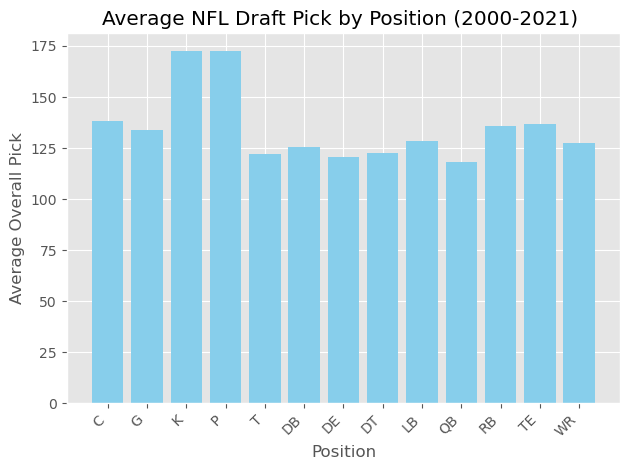

In [21]:
overall_position_means = merged_data.groupby('Position')['Overall'].mean()
print(overall_position_means)

# Visualizing
plt.bar(overall_position_means.index, overall_position_means, color ='skyblue')
plt.title('Average NFL Draft Pick by Position (2000-2021) ')
plt.xlabel('Position')
plt.ylabel('Average Overall Pick')
plt.xticks(rotation=45, ha ='right')
plt.tight_layout()
plt.show()

Evidently, players at the Kicker and Punter position seem to be selected much later in the draft relative to other positions. Quarterbacks tend to be selected earlier than other positions, with defensive edge (DE) players and Offensive Tackle (T) right behind them. Why might this be? 

History tells us that the most talented and NFL-ready players are selected in the first round of the draft. Let's visualize what the first round typically looks like by position.   

   Position    Overall
0         C  22.615385
1         G  19.160000
2         K  17.000000
3         T  14.282051
4        DB  18.640000
5        DE  15.379310
6        DT  16.333333
7        LB  16.794521
8        QB   9.953846
9        RB  17.823529
10       TE  20.880000
11       WR  16.875000


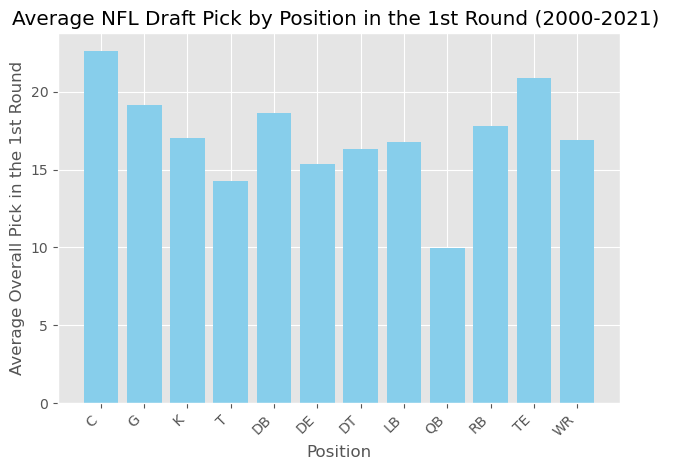

In [22]:
first_round_data = merged_data[merged_data['Round'] == 1]
rd1_overall_position_means = first_round_data.groupby('Position')['Overall'].mean().reset_index()
print(rd1_overall_position_means)

# Visualizing 
plt.bar(rd1_overall_position_means['Position'], rd1_overall_position_means['Overall'], color ='skyblue')
plt.title('Average NFL Draft Pick by Position in the 1st Round (2000-2021) ')
plt.xlabel('Position')
plt.ylabel('Average Overall Pick in the 1st Round')
plt.xticks(rotation=45, ha ='right')
plt.tight_layout()
plt.show()

We see that Quarterbacks are picked far earlier than the rest of the positions in the first round. Additionally, Tackles are taken quite early in addition to Quarterbacks. However, this is not a perfect visualization of the first round. For example, there has never been a Punter selected in the first round (which the data reflects), but Kickers are almost never taken in the first round. It would be unwise to assume based off the graph that Kickers are selected earlier than other position in the first round, as this is only taking the average. Let's make this a little more clear.

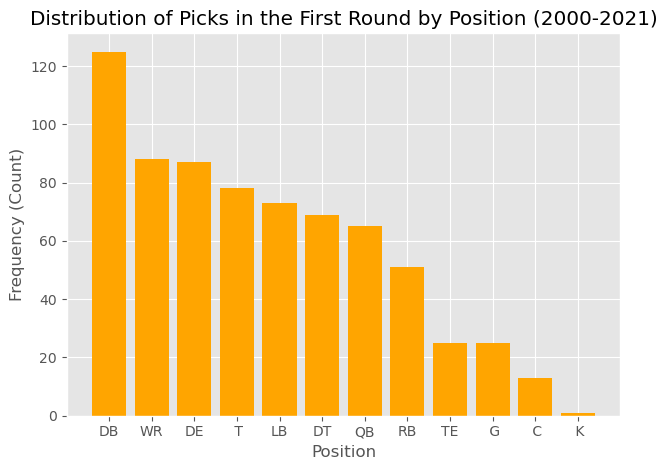

,position,count
0,DB,125
1,WR,88
2,DE,87
3,T,78
4,LB,73
5,DT,69
6,QB,65
7,RB,51
8,TE,25
9,G,25


In [23]:
# Calculate the frequency of positions drafted in the first round 
position_counts = first_round_data['Position'].value_counts().reset_index()
position_counts.columns = ['position', 'count']

plt.bar(position_counts['position'], position_counts['count'], color = 'orange', label = 'frequency')
plt.title('Distribution of Picks in the First Round by Position (2000-2021)')
plt.xlabel('Position')
plt.ylabel('Frequency (Count)')
plt.tight_layout()
plt.show()

position_counts

NOTE: Defensive Backs include BOTH the Safety and Cornerback positions. Thus, their total is obviously higher than other positions listed since they are encompassing two different positions. In this sense, it may be more appropriate to judge the Defensive Back position by their average spot selected in the first round. 

In [24]:
overall_position_means_yearly = merged_data.groupby(['Year', 'Position'])['Overall'].mean()

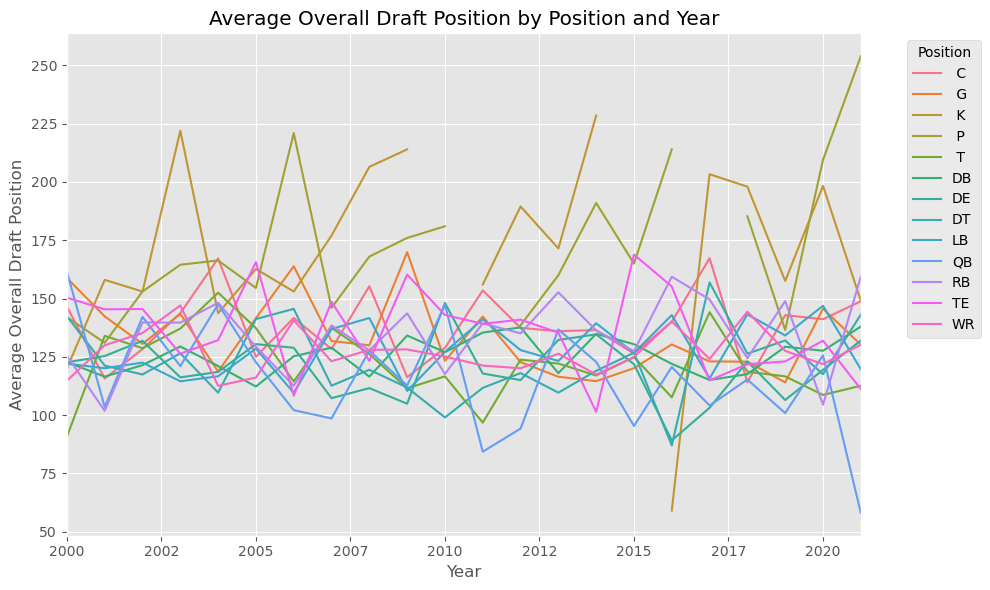

In [25]:
from matplotlib.ticker import FuncFormatter

# Unstack the multi-index series to pivot the 'Position' index into columns
overall_position_means_yearly_unstacked = overall_position_means_yearly.unstack()

# Unique colors for each position
color_palette = sns.color_palette("husl", len(overall_position_means_yearly_unstacked.columns))

# Plot the time series with unique colors
ax = overall_position_means_yearly_unstacked.plot(figsize=(10, 6), color=color_palette)
plt.xlabel('Year')
plt.ylabel('Average Overall Draft Position')
plt.title('Average Overall Draft Position by Position and Year')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Start from the left edge
ax.set_xlim(overall_position_means_yearly_unstacked.index[0], overall_position_means_yearly_unstacked.index[-1])

# Remove decimals
def format_func(value, tick_number):
    return int(value)

ax.xaxis.set_major_formatter(FuncFormatter(format_func))

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

The time series above suggests the growing need for quarterback talent in today's NFL. Having the largest impact on the game not only with their arm but also with their legs, it is not surprising to see a shift in how early teams and General Managers are willing to take quarterbacks. 

NOTE: For some years, punters and kickers did not have a single selection in the draft, hence the incomplete series. 

### Predictive Analysis: OLS Regression

There are many other insights we would like to gain from this dataset. The combine is a pivotal part of the scouting process for many NFL executives, and so we should attempt to discover what exactly these executives are looking for in their new players. 

In [26]:
# Renaming several columns of our dataset to avoid errors
merged_data.rename(columns={'40yd': 'Forty_yd'}, inplace=True)

merged_data.rename(columns={'Broad Jump': 'Broad_Jump'}, inplace=True)

merged_data.rename(columns={'3Cone': 'Cone_3'}, inplace=True)

formula = 'Overall ~ Ht + Wt + Forty_yd + Vertical + Bench + Broad_Jump + Cone_3 + Shuttle'

model = smf.ols(formula=formula, data=merged_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     30.42
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           2.06e-45
Time:                        18:22:09   Log-Likelihood:                -12009.
No. Observations:                2142   AIC:                         2.404e+04
Df Residuals:                    2133   BIC:                         2.409e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -232.4855     96.707     -2.404      0.0

We can derive some key insights from the regression results above. 
- We see that among the quantitative explanatory variables, all of the variables are significant at the 5% significance level except Vertical, Bench, and Shuttle. 
- Looking at the test statistic values, the values for Weight, 40yd, and Broad Jump are the highest in absolute value, suggesting that they are the most significant predictors in determining a player's overall selection.
- The intercept is nonsensical and simply an artifact of the regression. We cannot have a player with a Height and Weight of zero, nor can their overall selection be negative. 

That being said, caution should also be advised. For example, we see that a one unit increase in weight has an estimated decrease of approximately 1.20—holding all else constant—in a player's overall selection; however, a one unit increase in height has an estimated increase (taken later in the draft) of approximately 1.81 for the player's overall selection, holding all else constant. 

It is absolutely necessary to scrutinize these results before immediately interpreting them. For some positions, like Quarterback, we might expect an increase in height to help a player's draft stock, but that is not the case here for all positions. Why might that be? It may be because as we established before, quarterbacks are on average taken very early, and other larger positions (e.g., Offensive Linemen) are on average taken later in the draft. We can verify this by taking a look at how Height only affects the Quarterback position's overall selection.

In [27]:
# Subset the data to include only quarterbacks
qb_data = merged_data[merged_data['Position'] == 'QB']

# Many Quarterbacks do not run the same speed/conditioning drills as other positions
formula_qb = 'Overall ~ Ht'


model_qb = smf.ols(formula=formula_qb, data=qb_data).fit()

print(model_qb.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5.310
Date:                Tue, 16 Apr 2024   Prob (F-statistic):             0.0221
Time:                        18:22:09   Log-Likelihood:                -1347.6
No. Observations:                 233   AIC:                             2699.
Df Residuals:                     231   BIC:                             2706.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    636.2957    229.705      2.770      0.0

In the above model, we utilize a simple linear regression to regress overall selection on Height for Quarterbacks only. So, as a Quarterback's height increases by one unit, their estimated overall draft selection decreases (they are selected earlier in the draft) by approximately -7.05. Additionally, Height is significant at the 5% significance level. This result is far different than the OLS result we obtained earlier, and should highlight how important it is to investigate the results first. 

Regarding the university the player attended, OLS is more than likely going to conclude that none of the School indicator variables are significant. Thus, for simplicity, we will simply count the number of draft selections and first round draft selection by the top 20 schools. 

In [327]:
# Get the top 20 schools based on counts
top_20_schools = merged_data['School'].value_counts().head(20).index

# Count the instances of each school in the overall draft and first round
school_draft_counts = {}
school_first_round_counts = {}

for school in top_20_schools:
    # Count instances in overall draft
    overall_count = len(merged_data[merged_data['School'] == school])
    school_draft_counts[school] = overall_count
    
    # Count instances in first round
    first_round_count = len(merged_data[(merged_data['School'] == school) & (merged_data['Round'] == 1)])
    school_first_round_counts[school] = first_round_count

print("Counts of selections for top 20 schools:")
print()
for school, draft_count in school_draft_counts.items():
    print(f"{school}: Overall Draft Selections: {draft_count}, First Round Selections: {school_first_round_counts[school]}")

Counts of selections for top 20 schools:

Ohio State: Overall Draft Selections: 151, First Round Selections: 35
Alabama: Overall Draft Selections: 137, First Round Selections: 41
Louisiana State: Overall Draft Selections: 132, First Round Selections: 25
Florida: Overall Draft Selections: 125, First Round Selections: 25
Georgia: Overall Draft Selections: 123, First Round Selections: 22
Miami (FL): Overall Draft Selections: 122, First Round Selections: 32
USC: Overall Draft Selections: 117, First Round Selections: 24
Florida State: Overall Draft Selections: 113, First Round Selections: 24
Oklahoma: Overall Draft Selections: 105, First Round Selections: 18
Michigan: Overall Draft Selections: 101, First Round Selections: 16
Notre Dame: Overall Draft Selections: 100, First Round Selections: 11
Clemson: Overall Draft Selections: 89, First Round Selections: 18
Penn State: Overall Draft Selections: 88, First Round Selections: 13
Wisconsin: Overall Draft Selections: 88, First Round Selections: 

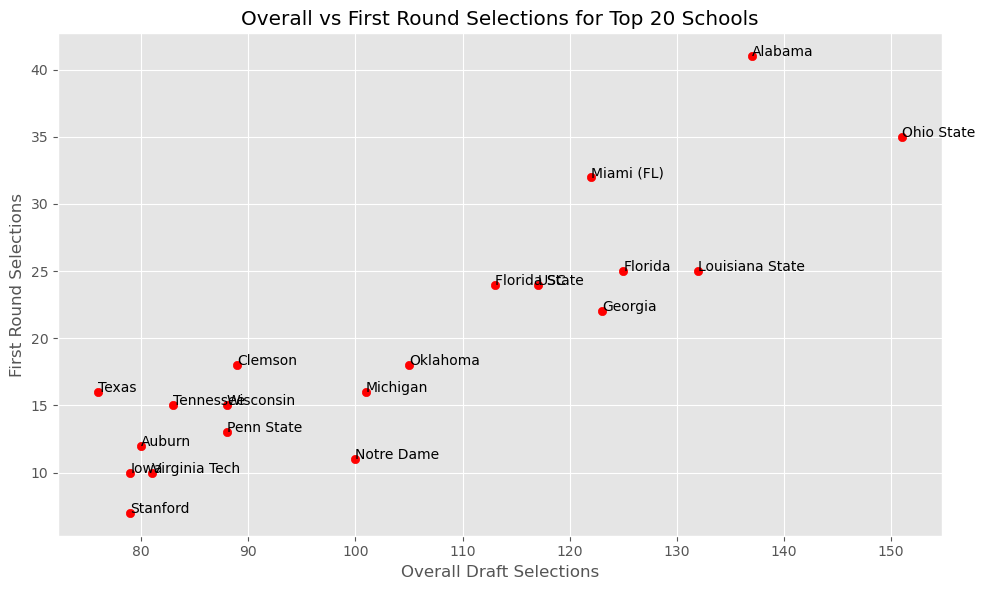

In [328]:
schools = list(school_draft_counts.keys())
overall_counts = list(school_draft_counts.values())
first_round_counts = list(school_first_round_counts.values())

plt.figure(figsize=(10, 6))
plt.scatter(overall_counts, first_round_counts, color='red')

plt.xlabel('Overall Draft Selections')
plt.ylabel('First Round Selections')
plt.title('Overall vs First Round Selections for Top 20 Schools')

# Add school names as annotations
for i, school in enumerate(schools):
    plt.annotate(school, (overall_counts[i], first_round_counts[i]))

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

We can see that from 2000-2021, Alabama and Ohio State tended to produce the most NFL-ready players.

Having a franchise Quarterback that starts every season is a huge boon to an NFL team. Without one, teams will desperately try each off-season to determine who is the best available player to start at Quarterback, whether that be through free agency or the draft. Of course, backup players are always needed due to how many injuries occur to players every year. Nevertheless, we will ask and answer the question: "Does already having a franchise quarterback affect how a team approaches the draft?"

We will attempt to answer this question by considering teams that have had great success with one starting quarterback from 2000-2021 (New England, New Orleans, Pittsburgh) as well as considering teams with minimal success with starting quarterbacks (Chicago, Cleveland, Jacksonville). 

In [329]:
# Define lists of teams for the two groups
successful_qb_teams = ['PATRIOTS', 'SAINTS', 'STEELERS']
poor_qb_teams = ['BEARS', 'BROWNS', 'JAGUARS']

# Create separate DataFrames for each group
good_qb = merged_data[merged_data['Team'].isin(successful_qb_teams)]
bad_qb = merged_data[merged_data['Team'].isin(poor_qb_teams)]

In [330]:
# Occurrences of each position for the successful QB teams
good_qb_team_positions = good_qb['Position'].value_counts()

# Occurrences of each position for the poor QB teams
bad_qb_team_positions = bad_qb['Position'].value_counts()

print("Positions drafted by successful QB teams:")
print(good_qb_team_positions)
print("\nPositions drafted by poor QB teams:")
print(bad_qb_team_positions)

Positions drafted by successful QB teams:
DB    94
LB    70
WR    58
 T    44
DT    44
DE    43
RB    38
TE    34
QB    27
 G    27
 C    18
 K     4
 P     4
Name: Position, dtype: int64

Positions drafted by poor QB teams:
DB    115
WR     72
LB     65
DE     46
RB     46
DT     42
 T     39
QB     27
 G     27
TE     25
 C     11
 K      5
 P      5
Name: Position, dtype: int64


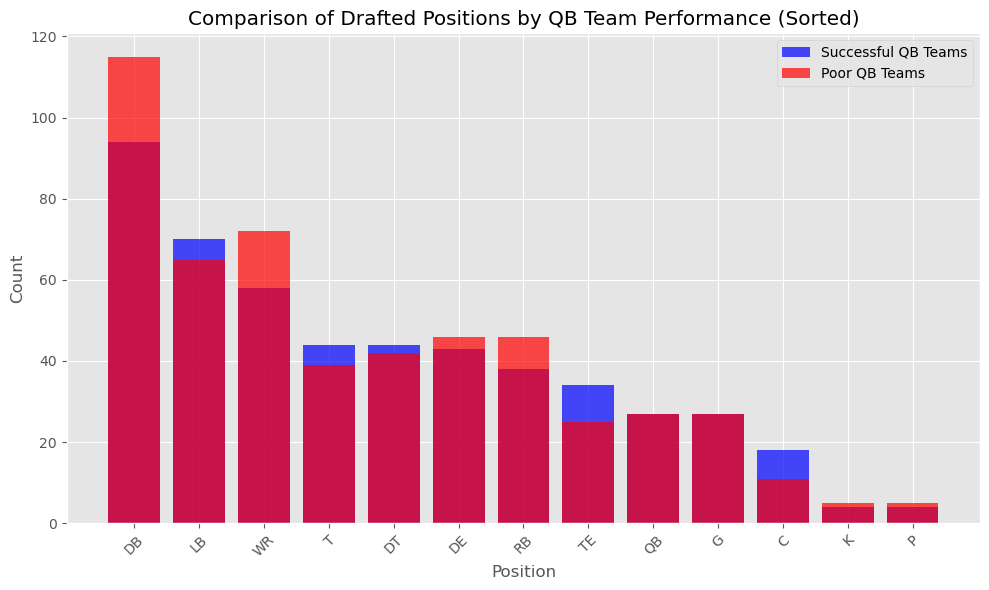

In [331]:
# Sort positions by overall counts for successful QB teams
good_qb_sorted = good_qb_team_positions.sort_values(ascending=False)

# Sort positions by overall counts for poor QB teams
bad_qb_sorted = bad_qb_team_positions.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(good_qb_sorted.index, good_qb_sorted, color='blue', alpha = 0.7, label='Successful QB Teams')
plt.bar(bad_qb_sorted.index, bad_qb_sorted, color='red', alpha = 0.7, label='Poor QB Teams')
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Comparison of Drafted Positions by QB Team Performance (Sorted)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Surprisingly, there is not much of a noticeable difference in how Quarterback-successful teams draft their players versus the teams that are not Quarterback-successful based on the distributions above. However, we can discern that the teams with poor Quarterback play generally have more draft picks at their disposal versus the Quarterback-successful teams. This is likely due to factors outside the draft, such as the poor Quarterback teams trading away their existing talented players for additional draft capital knowing that they won't make the playoffs without a talented Quarterback. 

## V. Conclusion

While this data does have its limitations and cannot be the only resource used to assess what a team might do in this year's NFL draft, it has nonetheless provided us some interesting insights. With data from 2000-2021, we determined that:

- Quarterbacks have continued to see their draft stock rise; that is, they are being taken earlier. 
- Offensive Tackle (T), behind quarterback, is the most coveted position in the first round. 
- Weight, 40-yard dash time, and Broad Jump are among the most significant predictors in determining one's overall draft selection.
- Height is a more significant predictor of overall selection for Quarterbacks than most other positions. 
- Alabama and Ohio State are the two most popular colleges for players drafted as well as for the most NFL-ready players (1st rd.)
- NFL teams tend to not make significant changes to their draft ideologies depending on their current Quarterback situation.

Of course, there are even more questions outside of our scope to consider following these results, such as:

- Have recently succesful teams (e.g., Kansas City) drafted differently than other teams? If so, what kinds of players are  they targeting? 
- Do some teams prefer players from certain colleges? If so, why?
- Are location and geographic preference relevant variables to consider when selecting players?
- Is there a long-term correlation between player attributes at the combine and future team success?
- Is there a long-term correlation between overall draft position and career success in the NFL? Can we compare this to undrafted free agents/players? 